In [2]:
'''Ques.1. You are given a CSV file “student_data.csv” with the following columns:
 (Note: student_data.csv is provided with assignment)
• Student_ID: Unique identifier for each student.
• Name: Name of the student.
• Age: Age of the student.
• Course: The course the student is enrolled in (Math, Science, History, or 
English).
• Marks: Marks obtained by the student.
• Enrollment_Date: The date on which the student enrolled.
• Performance_Rating: Performance rating of the student (on a scale of 1 to 5).

Tasks to Perform
➢ Load the data into a Pandas DataFrame.
➢ Check for missing values in the columns and fill them appropriately.
o For numerical columns like Age and Marks, fill missing values with the 
mean or median of the respective columns.
o If any categorical data is missing, fill it with the most frequent value 
(mode).
➢ Handle outliers in the Marks column using the IQR (Interquartile Range) 
method.
o Replace the outliers with the median of the Marks column.
➢ Convert the Enrollment_Date column to a datetime data type.
o Extract the year and month of enrollment and create two new columns 
named Enrollment_Year and Enrollment_Month.
➢ Classify students into levels of Seniority based on their Performance_Rating
as follows:
o 1-2: Junior
o 3-4: Mid-level
o 5: Senior
➢ Save the cleaned DataFrame as a new CSV file named 
cleaned_student_data.csv.'''

import pandas as pd

df = pd.read_csv("student_data.csv")
print(df)
df.info()
df["Enrollment_Date"] = pd.to_datetime(df["Enrollment_Date"])
df.dtypes

    Student_ID        Name   Age   Course  Marks Enrollment_Date  \
0         1001   Student_1  24.0  Science    NaN      2020-01-01   
1         1002   Student_2   NaN  Science   55.0      2020-01-31   
2         1003   Student_3  22.0  Science    NaN      2020-03-01   
3         1004   Student_4  24.0  English   86.0      2020-03-31   
4         1005   Student_5   NaN  English   90.0      2020-04-30   
5         1006   Student_6  22.0     Math    NaN      2020-05-30   
6         1007   Student_7  22.0     Math   94.0      2020-06-29   
7         1008   Student_8  24.0  English   91.0      2020-07-29   
8         1009   Student_9  19.0  Science   96.0      2020-08-28   
9         1010  Student_10  20.0  Science   42.0      2020-09-27   
10        1011  Student_11  24.0     Math   76.0      2020-10-27   
11        1012  Student_12  20.0  English   90.0      2020-11-26   
12        1013  Student_13  20.0     Math   46.0      2020-12-26   
13        1014  Student_14  22.0     Math   60.0

Student_ID                     int64
Name                          object
Age                          float64
Course                        object
Marks                        float64
Enrollment_Date       datetime64[ns]
Performance_Rating             int64
dtype: object

In [5]:
df.describe()

,Student_ID,Age,Marks,Enrollment_Date,Performance_Rating
count,20.00000,18.000000,17.000000,20,20.000000
mean,1010.50000,21.611111,71.470588,2020-10-12 00:00:00,3.100000
min,1001.00000,19.000000,42.000000,2020-01-01 00:00:00,1.000000
25%,1005.75000,20.000000,55.000000,2020-05-22 12:00:00,2.000000
50%,1010.50000,22.000000,76.000000,2020-10-12 00:00:00,3.500000
75%,1015.25000,22.750000,90.000000,2021-03-03 12:00:00,4.000000
max,1020.00000,24.000000,99.000000,2021-07-24 00:00:00,5.000000
std,5.91608,1.719743,20.549080,NaN,1.333772


In [7]:
df['Age'].fillna(df['Age'].mean(),inplace = True)
df['Marks'].fillna(df['Marks'].mean(),inplace = True)
print(df)

    Student_ID        Name        Age   Course      Marks Enrollment_Date  \
0         1001   Student_1  24.000000  Science  71.470588      2020-01-01   
1         1002   Student_2  21.611111  Science  55.000000      2020-01-31   
2         1003   Student_3  22.000000  Science  71.470588      2020-03-01   
3         1004   Student_4  24.000000  English  86.000000      2020-03-31   
4         1005   Student_5  21.611111  English  90.000000      2020-04-30   
5         1006   Student_6  22.000000     Math  71.470588      2020-05-30   
6         1007   Student_7  22.000000     Math  94.000000      2020-06-29   
7         1008   Student_8  24.000000  English  91.000000      2020-07-29   
8         1009   Student_9  19.000000  Science  96.000000      2020-08-28   
9         1010  Student_10  20.000000  Science  42.000000      2020-09-27   
10        1011  Student_11  24.000000     Math  76.000000      2020-10-27   
11        1012  Student_12  20.000000  English  90.000000      2020-11-26   

C:\Users\HP\AppData\Local\Temp\ipykernel_7188\443447242.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_7188\443447242.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [10]:
import numpy as np

Q1 = df['Marks'].quantile(0.25)
Q3 = df['Marks'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

outlier_indices = np.where((df['Marks'] < lower_bound) | (df['Marks'] > upper_bound))
print("Outliers Detected at position  = ",outlier_indices[0])

if len(outlier_indices[0]) > 0:
    df.loc[outlier_indices[0], Marks] = df['Marks'].median()
    print("Outliers in column have been replaced with the median value.")
else:
    print("No outliers detected in column. No changes made.")

print("\nAfter Outlier Handling:")
print(df)

6.25
140.25
Outliers Detected at position  =  []
No outliers detected in column. No changes made.

After Outlier Handling:
    Student_ID        Name        Age   Course      Marks Enrollment_Date  \
0         1001   Student_1  24.000000  Science  71.470588      2020-01-01   
1         1002   Student_2  21.611111  Science  55.000000      2020-01-31   
2         1003   Student_3  22.000000  Science  71.470588      2020-03-01   
3         1004   Student_4  24.000000  English  86.000000      2020-03-31   
4         1005   Student_5  21.611111  English  90.000000      2020-04-30   
5         1006   Student_6  22.000000     Math  71.470588      2020-05-30   
6         1007   Student_7  22.000000     Math  94.000000      2020-06-29   
7         1008   Student_8  24.000000  English  91.000000      2020-07-29   
8         1009   Student_9  19.000000  Science  96.000000      2020-08-28   
9         1010  Student_10  20.000000  Science  42.000000      2020-09-27   
10        1011  Student_11  24

In [13]:
df['Enrollment_Year'] = pd.DatetimeIndex(df['Enrollment_Date']).year
df['Enrollment_Month'] = pd.DatetimeIndex(df['Enrollment_Date']).month
print(df)


    Student_ID        Name        Age   Course      Marks Enrollment_Date  \
0         1001   Student_1  24.000000  Science  71.470588      2020-01-01   
1         1002   Student_2  21.611111  Science  55.000000      2020-01-31   
2         1003   Student_3  22.000000  Science  71.470588      2020-03-01   
3         1004   Student_4  24.000000  English  86.000000      2020-03-31   
4         1005   Student_5  21.611111  English  90.000000      2020-04-30   
5         1006   Student_6  22.000000     Math  71.470588      2020-05-30   
6         1007   Student_7  22.000000     Math  94.000000      2020-06-29   
7         1008   Student_8  24.000000  English  91.000000      2020-07-29   
8         1009   Student_9  19.000000  Science  96.000000      2020-08-28   
9         1010  Student_10  20.000000  Science  42.000000      2020-09-27   
10        1011  Student_11  24.000000     Math  76.000000      2020-10-27   
11        1012  Student_12  20.000000  English  90.000000      2020-11-26   

In [16]:
conditions = [(df['Performance_Rating'] <= 2), (df['Performance_Rating'] >=3) & (df['Performance_Rating'] <= 4),
              (df['Performance_Rating'] >=5)]
choices = ['Junior', 'Mid-Level', 'Senior']
df['ExperienceLevel'] = np.select(conditions, choices)
print(df)

    Student_ID        Name        Age   Course      Marks Enrollment_Date  \
0         1001   Student_1  24.000000  Science  71.470588      2020-01-01   
1         1002   Student_2  21.611111  Science  55.000000      2020-01-31   
2         1003   Student_3  22.000000  Science  71.470588      2020-03-01   
3         1004   Student_4  24.000000  English  86.000000      2020-03-31   
4         1005   Student_5  21.611111  English  90.000000      2020-04-30   
5         1006   Student_6  22.000000     Math  71.470588      2020-05-30   
6         1007   Student_7  22.000000     Math  94.000000      2020-06-29   
7         1008   Student_8  24.000000  English  91.000000      2020-07-29   
8         1009   Student_9  19.000000  Science  96.000000      2020-08-28   
9         1010  Student_10  20.000000  Science  42.000000      2020-09-27   
10        1011  Student_11  24.000000     Math  76.000000      2020-10-27   
11        1012  Student_12  20.000000  English  90.000000      2020-11-26   

In [21]:
'''Ques 1: Advanced Data Visualization with Student Data
Dataset: Use the cleaned cleaned_student_data.csv file from the previous assignment.'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("student_data.csv")

df["Marks"].fillna(df["Marks"].mean(),inplace = True)
df["Age"].fillna(df["Age"].median(),inplace = True)
print(df)

    Student_ID        Name   Age   Course      Marks Enrollment_Date  \
0         1001   Student_1  24.0  Science  71.470588      2020-01-01   
1         1002   Student_2  22.0  Science  55.000000      2020-01-31   
2         1003   Student_3  22.0  Science  71.470588      2020-03-01   
3         1004   Student_4  24.0  English  86.000000      2020-03-31   
4         1005   Student_5  22.0  English  90.000000      2020-04-30   
5         1006   Student_6  22.0     Math  71.470588      2020-05-30   
6         1007   Student_7  22.0     Math  94.000000      2020-06-29   
7         1008   Student_8  24.0  English  91.000000      2020-07-29   
8         1009   Student_9  19.0  Science  96.000000      2020-08-28   
9         1010  Student_10  20.0  Science  42.000000      2020-09-27   
10        1011  Student_11  24.0     Math  76.000000      2020-10-27   
11        1012  Student_12  20.0  English  90.000000      2020-11-26   
12        1013  Student_13  20.0     Math  46.000000      2020-1

C:\Users\HP\AppData\Local\Temp\ipykernel_7188\3069614757.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Marks"].fillna(df["Marks"].mean(),inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_7188\3069614757.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

<BarContainer object of 20 artists>

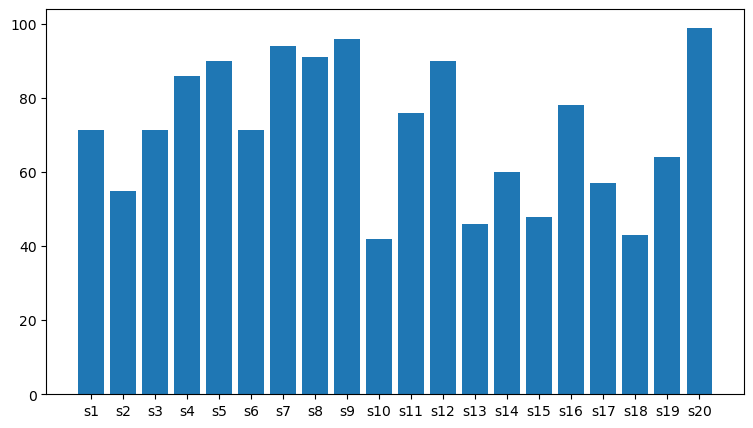

In [24]:
# Create a bar plot to visualize the average marks of students for each Course.

plt.figure(figsize = (9,5))
df.Name = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20']
x =df.Name
y = df.Course
z = df.Marks
plt.bar(x,z)


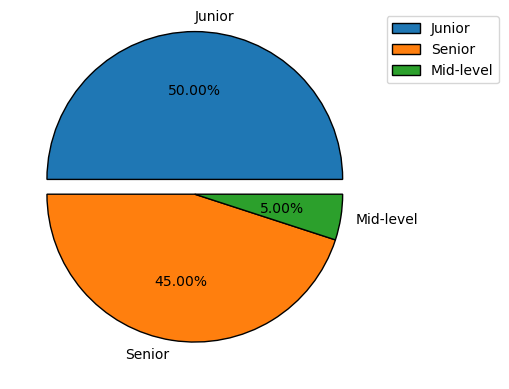

In [28]:
#o Create a pie chart to show the percentage distribution of students across 
#different Performance Levels (Junior, Mid-level, Senior).
# Use labels and an exploded slice for the largest section.'''


cond = [df['Performance_Rating']<=2,df['Performance_Rating']==3,df['Performance_Rating']>3]
choice = ['Junior', 'Mid-level', 'Senior']
b = np.select(cond,choice)
df['Performance_Level'] = b
size = df['Performance_Level'].value_counts()
label = df['Performance_Level'].unique()

myexplode = [0.1,0,0]

plt.pie(size, autopct = '%0.2f%%', labels = label,explode = myexplode, wedgeprops={'linewidth': 1, 'linestyle': 'solid','edgecolor' : 'black'});

plt.legend(bbox_to_anchor=(1, 1))

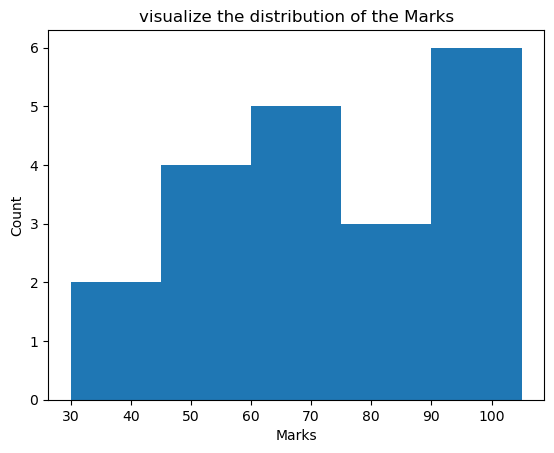

In [31]:
# Create a histogram to visualize the distribution of the Marks column.
# Use an appropriate number of bins to clearly represent the distribution.
# Add labels for the x-axis, y-axis, and title.'''

bin = [30,45,60,75,90, 105]
plt.hist(df['Marks'], bins = bin)
plt.xlabel("Marks")
plt.ylabel("Count")
plt.title("visualize the distribution of the Marks");

C:\Users\HP\AppData\Local\Temp\ipykernel_7188\3506154860.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4["Marks"].fillna(df4["Marks"].mean(),inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_7188\3506154860.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

     Age      Marks  Performance_Rating Performance_Level
0   24.0  71.470588                   2            Junior
1   22.0  55.000000                   2            Junior
2   22.0  71.470588                   1            Junior
3   24.0  86.000000                   2            Junior
4   22.0  90.000000                   5            Senior
5   22.0  71.470588                   2            Junior
6   22.0  94.000000                   4            Senior
7   24.0  91.000000                   4            Senior
8   19.0  96.000000                   4            Senior
9   20.0  42.000000                   4            Senior
10  24.0  76.000000                   5            Senior
11  20.0  90.000000                   3         Mid-level
12  20.0  46.000000                   1            Junior
13  22.0  60.000000                   4            Senior
14  21.0  48.000000                   2            Junior
15  20.0  78.000000                   4            Senior
16  23.0  57.0

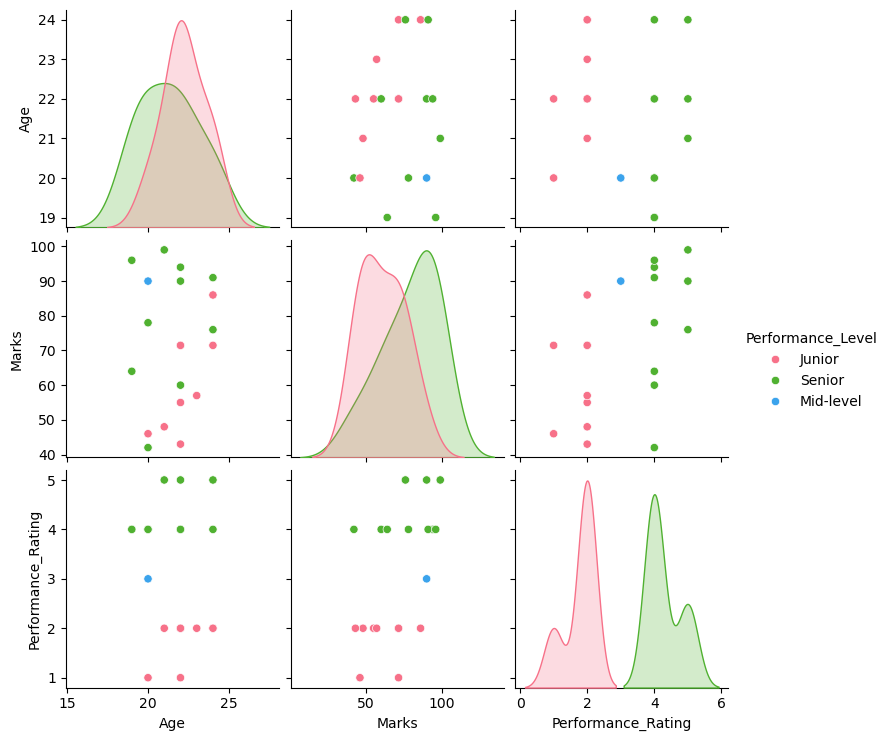

In [53]:
'''Pair Plot and Distribution Plots
Task:
• Load the cleaned_student_data.csv file.
• Use the Seaborn pairplot() function to visualize the relationships between the 
following columns:
o Age, Marks, Performance Rating.
• Customize the pairplot by using hue to differentiate students by Performance 
Level (Junior, Mid-level, Senior).
• Create a distribution plot for the Marks column using Seaborn.
o Use the kde=True option to visualize the density curve'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df4 = pd.read_csv("student_data.csv")

df4["Marks"].fillna(df4["Marks"].mean(),inplace = True)
df4["Age"].fillna(df4["Age"].median(),inplace = True)
df5 = pd.DataFrame(df4, columns = ['Age', 'Marks', 'Performance_Rating'])

cond = [df5['Performance_Rating']<=2,df5['Performance_Rating']==3,df5['Performance_Rating']>3]
choice = ['Junior', 'Mid-level', 'Senior']
b = np.select(cond,choice)
df5['Performance_Level'] = b
print(df5)


sns.pairplot(df5 ,hue='Performance_Level', palette="husl")

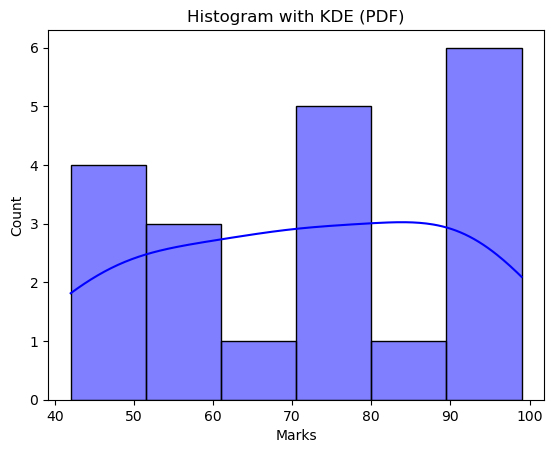

In [51]:
sns.histplot(df5['Marks'], kde=True, color='blue')
plt.title("Histogram with KDE (PDF)")

plt.show()

In [36]:
#E-commerce Data Analysis


df1 = pd.read_csv("ecommerce_sales.csv")
df1['year'] = pd.DatetimeIndex(df1['Order_Date']).year
df1['month'] = pd.DatetimeIndex(df1['Order_Date']).month
df1['Month_Sales'] = df1['Quantity_Sold']*df1['Price']
df1

,Order_ID,Product_Category,Quantity_Sold,Price,Order_Date,year,month,Month_Sales
0,OID1,Electronics,2,500,2024-01-01,2024,1,1000
1,OID2,Clothing,1,150,2024-01-08,2024,1,150
2,OID3,Home & Kitchen,4,250,2024-01-15,2024,1,1000
3,OID4,Books,3,100,2024-01-22,2024,1,300
4,OID5,Beauty & Personal Care,5,300,2024-01-29,2024,1,1500
5,OID6,Electronics,1,600,2024-02-05,2024,2,600
6,OID7,Clothing,2,200,2024-02-12,2024,2,400
7,OID8,Home & Kitchen,3,350,2024-02-19,2024,2,1050
8,OID9,Books,4,120,2024-02-26,2024,2,480
9,OID10,Beauty & Personal Care,2,450,2024-03-04,2024,3,900


       Month_Sales  month
month                    
1             3950      1
2             2530      2
3             2360      3
4             5440      4
5             1985      5


Text(0, 0.5, 'Total Sales')

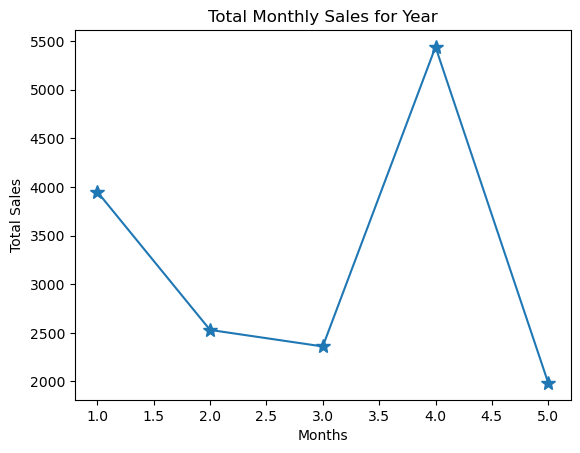

In [40]:
'''Line Plot:
o Extract the month-wise total sales (calculated as Quantity_Sold * Price) 
from the dataset.
o Create a line plot to visualize the total monthly sales for the year.
o Add labels for the x-axis, y-axis, and title'''

df2 = pd.DataFrame(df1, columns = ['month','Month_Sales'])
a = df2.groupby(['month']).sum()

a['month'] = df2['month'].unique()
print(a)

plt.plot(a.month,a.Month_Sales, marker = "*", markersize = 10)
plt.title("Total Monthly Sales for Year")
plt.xlabel("Months")
plt.ylabel("Total Sales")

2.5


Text(0, 0.5, 'Price')

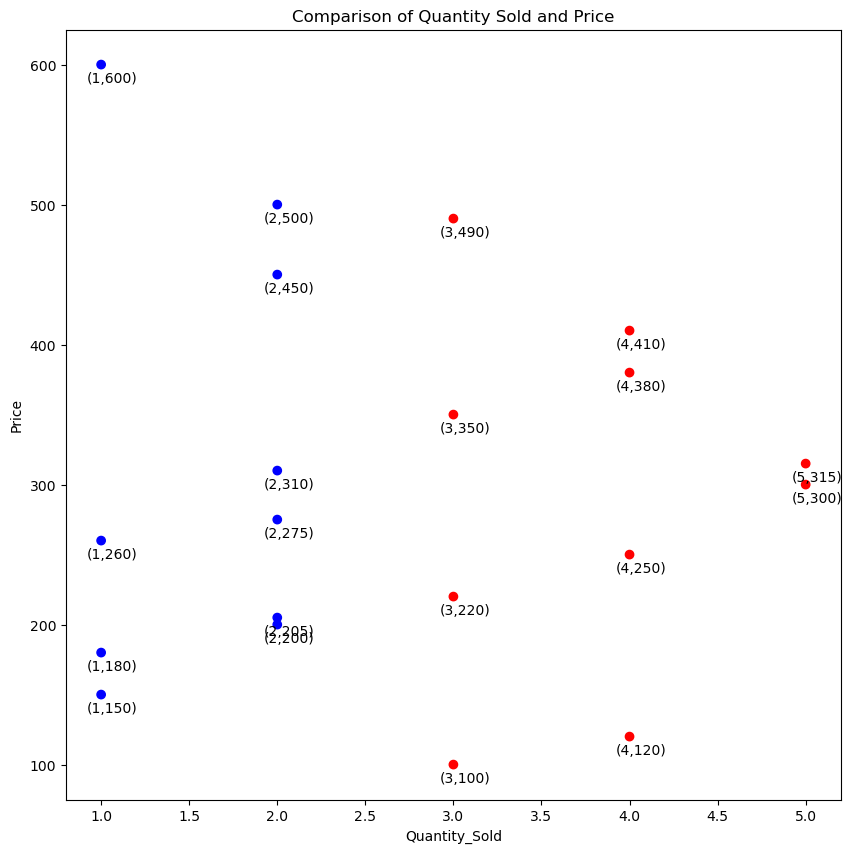

In [43]:
'''Scatter Plot:
o Create a scatter plot for Price vs Quantity Sold.
o Use color to differentiate points where Quantity Sold is above the median 
vs below the median.
o Add labels for the x-axis, y-axis, and title'''
plt.figure(figsize = (10,10))
x = df1.Quantity_Sold
y = df1.Price
c = df1['Quantity_Sold'].median()
print(c)

color1 = np.where(df1['Quantity_Sold'] >=c, 'red', 'blue')

plt.scatter(x,y, c = color1)
for x,y in zip(x,y):

    label = f"({x},{y})"

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(-10,-10), # distance from text to points (x,y)
                 
                 ha = 'left', va = 'center') # 

plt.title("Comparison of Quantity Sold and Price")
plt.xlabel("Quantity_Sold")
plt.ylabel("Price")

                        Month_Sales        Product_Category
Product_Category                                           
Beauty & Personal Care         4450  Beauty & Personal Care
Books                          2905                   Books
Clothing                       2690                Clothing
Electronics                    3730             Electronics
Home & Kitchen                 2490          Home & Kitchen


Text(0, 0.5, 'Total Revenue')

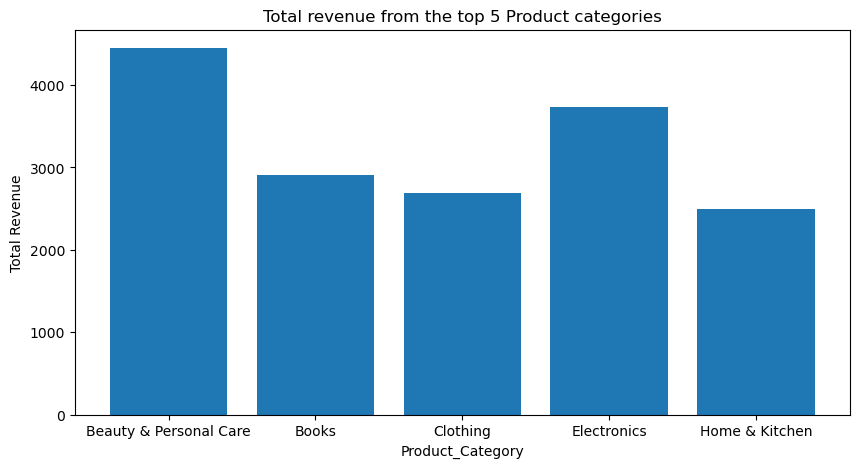

In [46]:
'''Bar Plot:
o Create a bar plot to show the total revenue from the top 5 Product 
Categories.
o Label the x-axis, y-axis, and title appropriately.'''

plt.figure(figsize = (10,5))
d = df1['Product_Category'].unique()

df3 = pd.DataFrame(df1, columns = ['Product_Category','Month_Sales'])
e = df3.groupby(['Product_Category']).sum()

f = df3.sort_values(by='Product_Category', ascending=True)
g = f['Product_Category'].unique()

e['Product_Category'] = g
print(e)
plt.bar(e.Product_Category,e.Month_Sales)
plt.title("Total revenue from the top 5 Product categories")
plt.xlabel("Product_Category")
plt.ylabel("Total Revenue")